In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('car_evaluation.csv')

In [5]:
df = pd.DataFrame(data)

In [6]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [7]:
df.columns = ['buy','maintenance','doors','persons','lugboot','safety','value']

In [8]:
df.head()

,buy,maintenance,doors,persons,lugboot,safety,value
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buy          1727 non-null   object
 1   maintenance  1727 non-null   object
 2   doors        1727 non-null   object
 3   persons      1727 non-null   object
 4   lugboot      1727 non-null   object
 5   safety       1727 non-null   object
 6   value        1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


# DATA DESCRIPTION 
### BUYING : vhigh,high,med,low
### MAINTENANCE : vhigh,high,med,low
### DOORS : 2,3,4 and more 
### PERSONS : 2,3,4 and more 
### LUGBOOT : small,med,low 
### SAFETY : high,med,low
### VALUE : unacc, acc, good, verygood

In [12]:
df.value_counts()

buy    maintenance  doors  persons  lugboot  safety  value
high   high         2      2        big      high    unacc    1
med    med          4      more     small    med     acc      1
                                             high    acc      1
                                    med      med     acc      1
                                             low     unacc    1
                                                             ..
low    low          3      2        med      med     unacc    1
                                             low     unacc    1
                                             high    unacc    1
                                    big      med     unacc    1
vhigh  vhigh        5more  more     small    med     unacc    1
Length: 1727, dtype: int64

In [17]:
val = df.value.value_counts()   #here we consider target variable as values (feature)

<AxesSubplot:title={'center':'targetcounts'}>

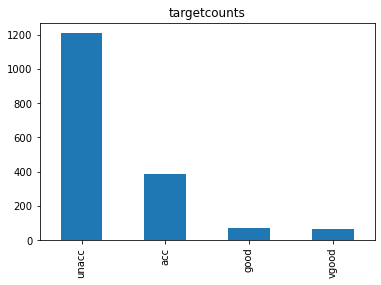

In [19]:
val.plot(kind='bar', title ='targetcounts')

C:\Users\SIDHARTH KANCHARLA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='value', ylabel='count'>

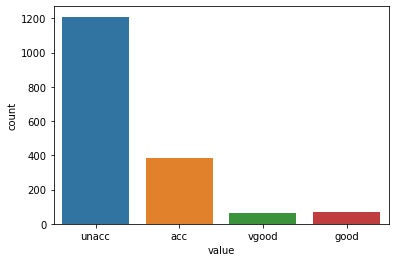

In [21]:
sns.countplot(df['value'])

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
l1 = LabelEncoder()

In [24]:
for i in df.columns :
    df[i] = l1.fit_transform(df[i])

In [25]:
df.head()

,buy,maintenance,doors,persons,lugboot,safety,value
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   buy          1727 non-null   int32
 1   maintenance  1727 non-null   int32
 2   doors        1727 non-null   int32
 3   persons      1727 non-null   int32
 4   lugboot      1727 non-null   int32
 5   safety       1727 non-null   int32
 6   value        1727 non-null   int32
dtypes: int32(7)
memory usage: 47.3 KB


<AxesSubplot:>

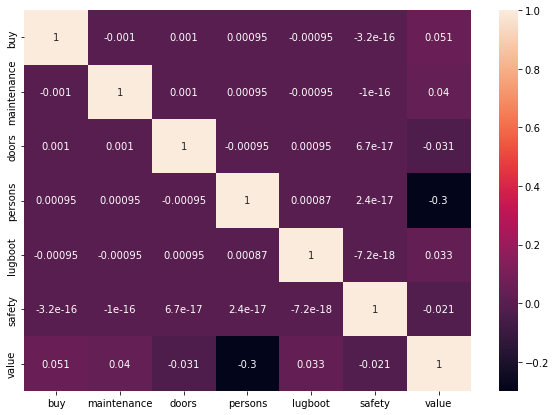

In [26]:
fig = plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)

#### as per the correlation matrix apart from diagonal elements we can say that the data is mostly imbalanced 

In [27]:
from sklearn.model_selection import train_test_split

In [29]:
x = df[df.columns[:-1]]
y = df['value']

In [31]:
x.head(2)

,buy,maintenance,doors,persons,lugboot,safety
0,3,3,0,0,2,2
1,3,3,0,0,2,0


In [32]:
y.head(2)

0    2
1    2
Name: value, dtype: int32

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [42]:
x_train.shape

(1381, 6)

In [43]:
x_test.shape

(346, 6)

In [46]:
!pip install category_encoders

In [48]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['buy', 'maintenance', 'doors', 'persons', 'lugboot', 'safety'])
#encoder is used to convert categorical values into numerical values in order to make our modelling proccess more effective

In [49]:
encoder.fit_transform(x_train)
encoder.fit_transform(x_train)

,buy,maintenance,doors,persons,lugboot,safety
939,1,1,1,1,1,1
34,2,1,2,2,2,2
1534,3,2,3,1,1,2
1714,3,3,4,3,1,2
1127,1,2,2,1,1,3
...,...,...,...,...,...,...
1276,1,3,4,2,2,2
974,1,4,3,2,1,3
1396,3,1,4,1,3,2
817,4,3,1,2,2,2


In [50]:
from sklearn.tree import  DecisionTreeClassifier

In [65]:
gini_class = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

In [66]:
gini_class.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [67]:
y_pred = gini_class.predict(x_test)

In [68]:
y_pred_train = gini_class.predict(x_train)

In [69]:
y_pred_train

array([0, 2, 0, ..., 0, 2, 2])

In [70]:
entropy_class = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [71]:
entropy_class.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [72]:
y1_pred = entropy_class.predict(x_test)

In [73]:
y1_pred_train = entropy_class.predict(x_train)

In [75]:
y1_pred_train

array([0, 2, 0, ..., 0, 2, 2])

In [95]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

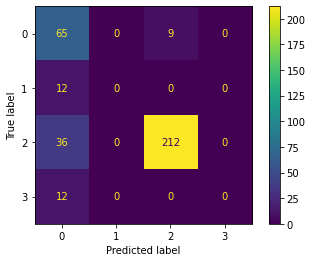

In [99]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [78]:
accuracy_score(y_test, y_pred)

0.8005780346820809

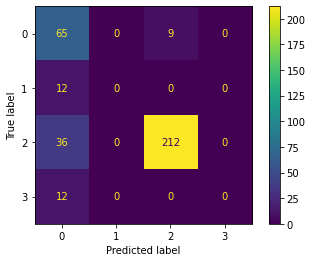

In [98]:
cm1 = confusion_matrix(y_test, y1_pred)
cm1_display = ConfusionMatrixDisplay(cm1).plot()

In [80]:
accuracy_score(y_test, y1_pred)

0.8005780346820809

In [81]:
accuracy_score(y_train, y_pred_train)

0.774800868935554

In [82]:
accuracy_score(y_train, y1_pred_train)

0.774800868935554

In [83]:
from sklearn import tree

[Text(0.375, 0.875, 'X[3] <= 0.5\ngini = 0.462\nsamples = 1381\nvalue = [310, 57, 961, 53]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 463\nvalue = [0, 0, 463, 0]'),
 Text(0.5, 0.625, 'X[5] <= 0.5\ngini = 0.584\nsamples = 918\nvalue = [310, 57, 498, 53]'),
 Text(0.25, 0.375, 'X[0] <= 2.5\ngini = 0.627\nsamples = 305\nvalue = [165, 23, 64, 53]'),
 Text(0.125, 0.125, 'gini = 0.61\nsamples = 228\nvalue = [128, 23, 24, 53]'),
 Text(0.375, 0.125, 'gini = 0.499\nsamples = 77\nvalue = [37, 0, 40, 0]'),
 Text(0.75, 0.375, 'X[5] <= 1.5\ngini = 0.44\nsamples = 613\nvalue = [145, 34, 434, 0]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 294\nvalue = [0, 0, 294, 0]'),
 Text(0.875, 0.125, 'gini = 0.589\nsamples = 319\nvalue = [145, 34, 140, 0]')]

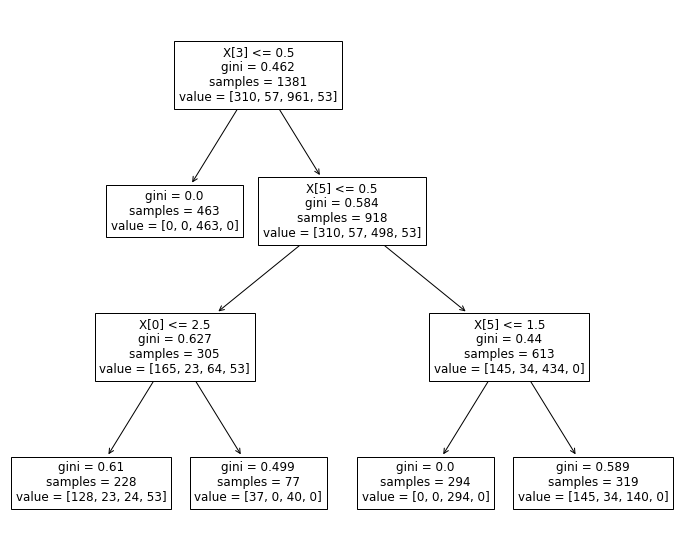

In [84]:
plt.figure(figsize=(12,10))
tree.plot_tree(gini_class.fit(x_train, y_train))

[Text(0.375, 0.875, 'X[3] <= 0.5\nentropy = 1.218\nsamples = 1381\nvalue = [310, 57, 961, 53]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 463\nvalue = [0, 0, 463, 0]'),
 Text(0.5, 0.625, 'X[5] <= 0.5\nentropy = 1.494\nsamples = 918\nvalue = [310, 57, 498, 53]'),
 Text(0.25, 0.375, 'X[0] <= 2.5\nentropy = 1.672\nsamples = 305\nvalue = [165, 23, 64, 53]'),
 Text(0.125, 0.125, 'entropy = 1.633\nsamples = 228\nvalue = [128, 23, 24, 53]'),
 Text(0.375, 0.125, 'entropy = 0.999\nsamples = 77\nvalue = [37, 0, 40, 0]'),
 Text(0.75, 0.375, 'X[5] <= 1.5\nentropy = 1.076\nsamples = 613\nvalue = [145, 34, 434, 0]'),
 Text(0.625, 0.125, 'entropy = 0.0\nsamples = 294\nvalue = [0, 0, 294, 0]'),
 Text(0.875, 0.125, 'entropy = 1.383\nsamples = 319\nvalue = [145, 34, 140, 0]')]

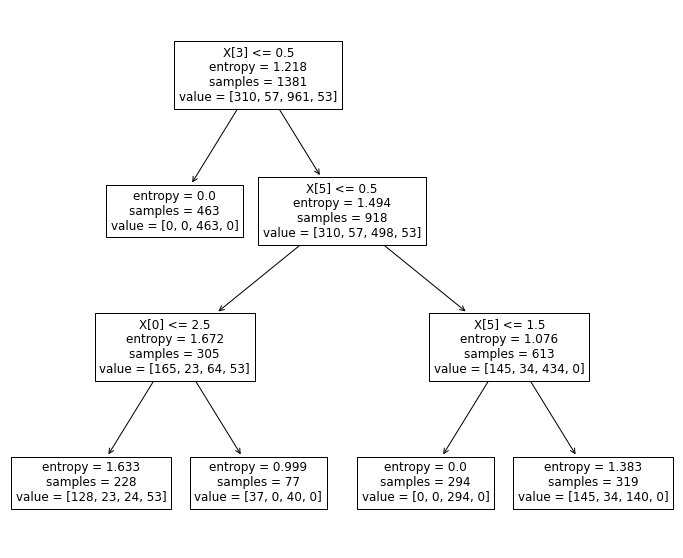

In [85]:
plt.figure(figsize=(12,10))
tree.plot_tree(entropy_class.fit(x_train, y_train))

In [86]:
from sklearn.metrics import classification_report

In [88]:
print(classification_report(y_test, y1_pred))

              precision    recall  f1-score   support

           0       0.52      0.88      0.65        74
           1       0.00      0.00      0.00        12
           2       0.96      0.85      0.90       248
           3       0.00      0.00      0.00        12

    accuracy                           0.80       346
   macro avg       0.37      0.43      0.39       346
weighted avg       0.80      0.80      0.79       346



C:\Users\SIDHARTH KANCHARLA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SIDHARTH KANCHARLA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SIDHARTH KANCHARLA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.88      0.65        74
           1       0.00      0.00      0.00        12
           2       0.96      0.85      0.90       248
           3       0.00      0.00      0.00        12

    accuracy                           0.80       346
   macro avg       0.37      0.43      0.39       346
weighted avg       0.80      0.80      0.79       346



C:\Users\SIDHARTH KANCHARLA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SIDHARTH KANCHARLA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SIDHARTH KANCHARLA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Model accuracy score with criterion gini index: 0.8021
### Training-set accuracy score: 0.7865
### Training set score: 0.7865
### Test set score: 0.8021
### Model accuracy score with criterion entropy: 0.8021
### Training-set accuracy score: 0.7865
### Training set score: 0.7865
### Test set score: 0.8021

### x[3] == PERSONS (IT IS THE ROOT NODE)
### x[0] == buy 
### x[5] == safety 

#### CONCLUSION : Compare both entropy and Gini criterias The entropy values are high and also may contain impurity data thus in gini criteria the gini_impurity was less and started deriving the dress until zeroes are produced

#### The MAINTENANCE,DOORS values are the pure nodes without impurities in them in both gini and entropy so we have stopped its over fitting there the values of the cars which are MAINTANANCE will be selled more compare to others  

In [94]:
x.tail(5)

,buy,maintenance,doors,persons,lugboot,safety
1722,1,1,3,2,1,2
1723,1,1,3,2,1,0
1724,1,1,3,2,0,1
1725,1,1,3,2,0,2
1726,1,1,3,2,0,0
